In [63]:
from __future__ import print_function

# for data analysis
import pandas as pd 
import numpy as np

# for data visuals
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# for deep neural network
import keras

# for rescaling data
from sklearn.preprocessing import MinMaxScaler


### Step 1: Reading data
#####  splitting data into 2 sets-train and test sets
##### anything with last column more than 1, we make to 1 as its a binary class problem problem
##### done by pandas to do so


In [65]:

# names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope','ca','thal','num']
trainData = pd.read_csv('processed_cleveland_data_train.csv')
# actualData= pd.read_csv('processed_cleveland_data.csv')
# print (actualdata.size)
testData = pd.read_csv('processed_cleveland_data_test.csv')
# print (trainData.size)
# print (testData.size)

# Parameter of interest is num, for now this is a binary problem
def replace_predict(df):
    df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)

        
replace_predict(trainData)
replace_predict(testData)
# replace_predict(actualData)
# dataframe = pd.read_csv(actualData, names=names)
# print(dataframe)
scaler = MinMaxScaler(feature_range=(0, 1))

Xtrain = trainData.drop(['num'], axis=1)
Ytrain = trainData['num']


Xtest = testData.drop(['num'], axis=1)
Ytest = testData['num']

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

# trainData.sample(10)

/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [66]:
# sns.pointplot(x='age', y='num', data=trainData)


### Step 2: Define Model
#### This is binary classification model, so the model output is yes or no, thus making it ideal for the problem 
#### making use of keras sequential model using tensorflow, tensor flow has main algorthims, tensor flow looks diff., keras API using tensorflow algorthims to solve the problem



In [67]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
# creating model
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(5,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

### Step 3: Compile Model


In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Step 4: Fit model

In [69]:
print(Xtrain)
print(Ytrain)
model.fit(Xtrain, Ytrain, epochs=350, batch_size=8)


[[0.70833333 1.         0.         ... 1.         0.         0.75      ]
 [0.79166667 1.         1.         ... 0.5        1.         0.        ]
 [0.79166667 1.         1.         ... 0.5        0.66666667 1.        ]
 ...
 [0.5625     1.         1.         ... 1.         0.         1.        ]
 [0.35416667 1.         1.         ... 0.         0.         1.        ]
 [0.41666667 0.         0.33333333 ... 0.5        0.         0.        ]]
0      0
1      1
2      1
3      0
4      0
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     0
29     1
      ..
206    1
207    0
208    1
209    0
210    1
211    1
212    0
213    0
214    0
215    0
216    0
217    0
218    0
219    0
220    1
221    1
222    0
223    0
224    0
225    1
226    1
227    0
228    1
229    1
230    0
231    0
232    1
233    1
234    1
235    0
Name: n

ValueError: You are passing a target array of shape (236, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

### Step 5: Evaluate Model


In [70]:
# evaluate the model
# print(Xtest)
predictions= model.predict_classes(Xtest)
print(predictions)
print(Ytest)

# print(Ytest)
# count=0;
# for x in rounded:
    
#     if(x!= Yt )
# scores = model.evaluate(rounded, Ytest)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# from sklearn import model_selection
# scoring ='accuracy'
# seed=7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# results = model_selection.cross_val_score(model, Xtest, Ytest, cv=kfold, scoring=scoring)
# print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    1
23    0
24    0
25    1
26    1
27    1
28    1
29    0
     ..
31    0
32    1
33    0
34    1
35    0
36    0
37    0
38    1
39    0
40    1
41    0
42    1
43    0
44    1
45    1
46    1
47    0
48    0
49    1
50    0
51    1
52    1
53    1
54    0
55    1
56    1
57    1
58    1
59    1
60    1
Name: num, Length: 61, dtype: int64


### Save Model

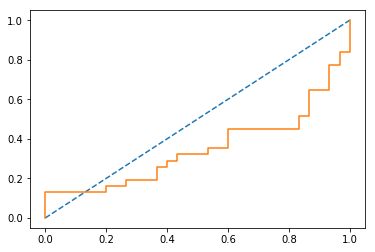

0.34946236559139787


In [71]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score


#RANDOM FOREST
probs = model.predict_proba(Xtest)

# keep probabilities for the positive outcome only

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ytest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()
#calulate ROC AUC score
loss = roc_auc_score(Ytest, probs)
print(loss)

In [72]:
from sklearn.metrics import matthews_corrcoef
count=0
matthewsCoeff=matthews_corrcoef(Ytest, predictions )   
print(matthewsCoeff)



-0.006369943624655904


In [62]:
from keras.models import load_model

model.save('/Users/Sahithi/HeartModels/HeartDiseaseKeras.h5')

OSError: Unable to create file (unable to open file: name = '/Users/Sahithi/HeartModels/HeartDiseaseKeras.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 602)

### Personal step- Prediction with the Model

In [20]:
predictions= model.predict(Xtrain)
rounded = [round(x[0]) for x in predictions]
print(rounded)



[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### Step 6: Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

alldata = pd.read_csv('processed_cleveland_data.csv')
replace_predict(alldata)
Xall = alldata.drop(['num'], axis=1)
Yall = alldata['num']

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train_index, test_index in kfold.split(Xall, Yall):
  # create model
 model = Sequential()
 model.add(Dense(12, input_dim=13, activation='relu'))
 model.add(Dense(8, activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 # Fit the model
 Xtrain, Xtest = Xall.values[train_index], Xall.values[test_index]
 Ytrain, Ytest = Yall.values[train_index], Yall.values[test_index]
 #print(Xtrain)
 #print(Ytrain)
 model.fit(Xtrain, Ytrain, epochs=350, batch_size=8, verbose=0)
 # evaluate the model
 scores = model.evaluate(Xall.values[test_index], Yall.values[test_index], verbose=0)
 print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))